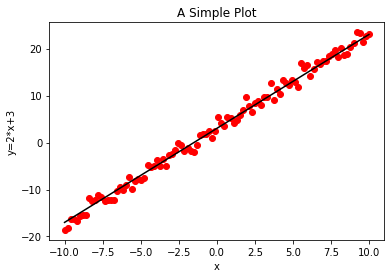

In [1]:
#Q1.Generate a set of points around a line y = ax + b (a) Choose a = 2 and b = 3
#(b) Select the range for x as [−10, 10] and generate n = 100 values for x in that interval.
#(c) Compute the values of y for each x as yi = 2xi + 3.
#(d) Plot the line y = 2x + 3 in black color.
#(e) Generate a set of n points around the line using the equation yi = 2xi + 3 + sigma*N(0, 1) (1) where sigma is the standard deviation and N(0, 1) is the zero-mean unity-
#variance normal distribution
#(f) Show the scatter plot of these noisy points (in red color) on the same graph generated in step (d).

import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-10, 10, 100)
ax = plt.axes()
ax.plot(x,2*x+3,'k')
ax.set(xlabel='x', ylabel='y=2*x+3',
       title='A Simple Plot');
y_i = 2*x + 3 + (0 + 1 * np.random.randn(100))
#x_i=np.random.normal(0.0, 1.0, 1000)

plt.scatter(x,y_i,c='red')
plt.show()


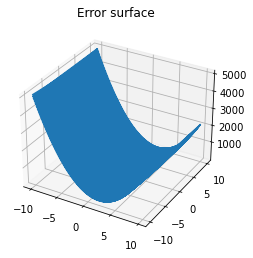

In [2]:
#Q.2. Plot the average error surface E for different values of a and b in the interval of [−10 : 0.1 : 10].
#(a) Vary both a and b in steps of 0.1 in the interval [−10, 10]
#(b) Compute the element-wise error as ei = yi − ˆyi where ˆyi = axi + b and yi is computed using equation 1 (c) Compute the average error as
#E =1/nSum(ei^2) (d) Compute the average error values for all combinations of a and b.(e) Plot the error surface with the values of a along x-axis, that of b
#along y-axis and E along z-axis.
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
import numpy as np
x = np.linspace(-10, 10, 100)
y_i = 2*x + 3 + (0 + 1 * np.random.randn(100))
a=np.arange(-10.0, 10.0 ,0.1)
b=np.arange(-10.0, 10.0, 0.1)
 
sum=0
E=[]
a_x = []
b_x = []
for i in a:

  for j in b:
    y_pred=i*x+j  
    E.append(np.mean((y_i - y_pred)**2))
    a_x.append(i)
    b_x.append(j)
avg_error=np.mean(E)
E=np.asarray(E)
E=E[:,np.newaxis]
a_x = np.array(a_x)
b_x = np.array(b_x)
a_x = a_x[:, np.newaxis]
b_x = b_x[:, np.newaxis]
ax = plt.axes(projection='3d')
#ax.scatter3D(a_x,b_x, E)
ax.plot_wireframe(a_x,b_x,E)
ax.set_title('Error surface');
plt.show()

In [3]:
#Q.3 Solve for a and b using Pseudo-inverse based approach on the points generated in question 1.
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
import numpy as np
x = np.linspace(-10, 10, 100)
y_i = 2*x + 3 + (0 + 1 * np.random.randn(100))
x0=np.ones(100)
xx=np.concatenate((np.matrix(x0).T,np.matrix(x).T),axis=1)
w=np.dot(np.linalg.pinv(xx),y_i)
a=np.asarray(w).reshape(-1)[1]
b=np.asarray(w).reshape(-1)[0]
print("The slope of line is:",a)
print("The intercept of line is :",b)

The slope of line is: 2.019284802886725
The intercept of line is : 2.973296970438171


The value of learning rate is:  0.001
The value of a0 is : 0.9063952634583109
The value of b0 is : 0.04572285645079591
Theta0:          0.717,
Theta1:          1.609


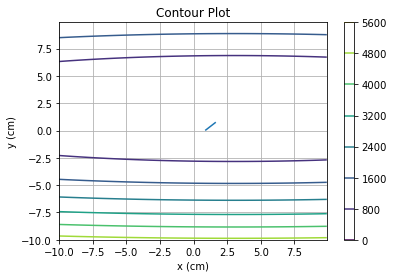

The value of learning rate is:  0.003
The value of a0 is : 1.3199743663599197
The value of b0 is : 1.4329783629628057
Theta0:          2.232,
Theta1:          2.120


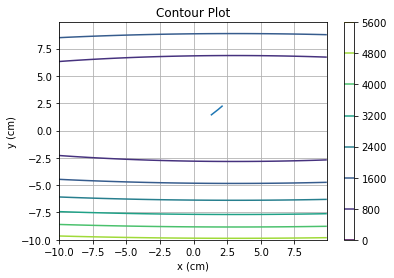

The value of learning rate is:  0.005
The value of a0 is : -2.1361550927367037
The value of b0 is : 2.4762619359909217
Theta0:          4.281,
Theta1:          0.389


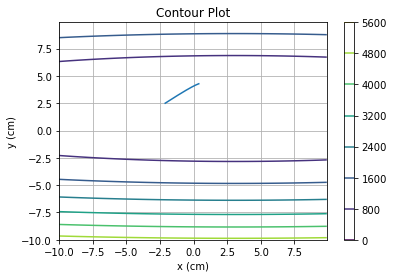

The value of learning rate is:  0.007
The value of a0 is : 0.8333658757841709
The value of b0 is : -0.6352823116800531
Theta0:          1.709,
Theta1:          2.923


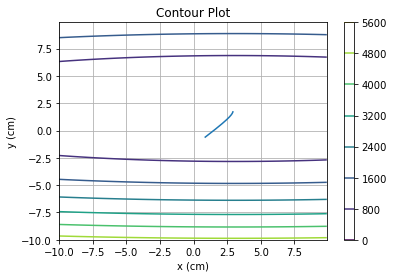

In [4]:
#Q4.Solve for a and b using the Gradient Descent approach where the values of p = (a, b)T in the (k + 1)th iteration is updated as
#pk+1 = pk − eta*pE|p=pk (3) Vary the update rate  and the initial values (a0, b0) and note the finalsolution after 100 iterations.
#Plot the trajectory of the solutions (ak, bk) for varying (a0, b0, eta) on the contour plot of E on (a, b) plane.
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline
X = 2 * np.random.rand(100,1)
y =  3 +2* X+np.random.randn(100,1)
def  cal_cost(theta,X,y):
    
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost
A, B = np.meshgrid(a,b)
E = E.reshape(200,200)   
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    m = len(y)
    theta_a=[]
    theta_b=[]
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        theta = theta -(1/m)*learning_rate*(X.T.dot((prediction - y)))
        theta_a.append(theta[1][0])
        theta_b.append(theta[0][0])
    return theta,theta_a,theta_b
lr =[0.001,0.003,0.005,0.007]
for i in lr:
    n_iter = 200

    theta = np.random.randn(2,1)
    print("The value of learning rate is: ",i)
    print("The value of a0 is :",theta[1][0])
    print("The value of b0 is :",theta[0][0])
    X_b = np.c_[np.ones((len(X),1)),X]
    theta,theta_a,theta_b= gradient_descent(X_b,y,theta,i,n_iter)
    print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))

    a=np.arange(-10.0, 10.0 ,0.1)
    b=np.arange(-10.0, 10.0 ,0.1)

    cp=plt.contour(a ,b, E);
    plt.plot(theta_a,theta_b)
    plt.colorbar(cp)
    plt.grid()
    plt.title('Contour Plot')
    plt.xlabel('x (cm)')
    plt.ylabel('y (cm)')
    plt.show() 

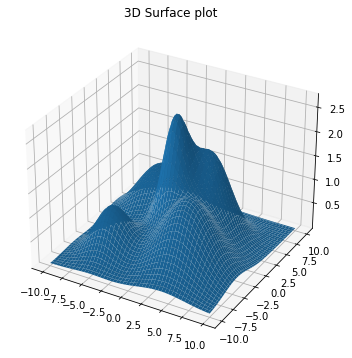

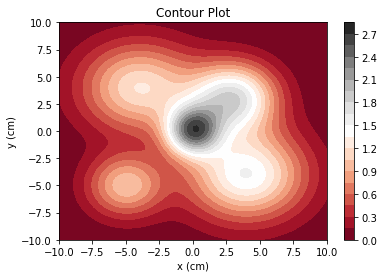

In [5]:
#Q.5. Consider the multi-modal function given by
#z = 1.7*np.exp(-((np.square(x-3)/10)+(np.square(y-3))/10))+np.exp(-((np.square(x+5)/8)+(np.square(y+5)/8)))+2*np.exp(-((np.square(x)/4)+(np.square(y))/5))+1.5*np.exp(-((np.square(x-4)/18)+(np.square(y+4))/16))+1.2*np.exp(-((np.square(x+4)/18)+(np.square(y-4))/16))
#Display the surface plot and contour plot of the above function in the search space given by Smin = [xmin, ymin]T = [−10,−10]T and Smax = [xmax, ymax]T = [10, 10]T .
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
def f(x,y):
  return 1.7*np.exp(-((np.square(x-3)/10)+(np.square(y-3))/10))+np.exp(-((np.square(x+5)/8)+(np.square(y+5)/8)))+2*np.exp(-((np.square(x)/4)+(np.square(y))/5))+1.5*np.exp(-((np.square(x-4)/18)+(np.square(y+4))/16))+1.2*np.exp(-((np.square(x+4)/18)+(np.square(y-4))/16))
x=np.linspace(-10,10, 100)
y=np.linspace(-10,10,100)
X, Y=np.meshgrid(x,y)
Z=f(X,Y)
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)
ax.set_title('3D Surface plot')
plt.show()
cp=plt.contourf(X, Y, Z, 20, cmap='RdGy');
plt.colorbar(cp)
plt.title('Contour Plot')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.show()
